In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("whitegrid") 

In [25]:
data = pd.read_csv("full_grouped.csv")
data.rename(columns={'New cases':'New_cases'},inplace=True)
data.rename(columns={'New deaths':'New_deaths'},inplace=True)
data.rename(columns={'New recovered':'New_recovered'},inplace=True)

data_df = pd.DataFrame()
data_df['Confirmé'] = data.loc[data['Country/Region']=='Spain'].New_cases
data_df['Guerri'] = data.loc[data['Country/Region']=='Spain'].Recovered
data_df['mor'] = data.loc[data['Country/Region']=='Spain'].Deaths

data_df = data_df[10:70]
data_df['day_count'] = list(range(1,len(data_df)+1))

ydata = [i for i in data_df.Confirmé]
ydata1 = [i for i in data_df.Guerri]
ydata2 = [i for i in data_df.mor]

xdata = data_df.day_count
y = np.array(ydata, dtype=float)
y1 = np.array(ydata1, dtype=float)
y2 = np.array(ydata2, dtype=float)
x = np.array(xdata, dtype=float)

In [26]:
data_df.head()

,Confirmé,Guerri,mor,day_count
2027,1,0,0,1
2214,0,0,0,2
2401,0,0,0,3
2588,0,0,0,4
2775,0,0,0,5


In [27]:
population = float(46094000 )
N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0
mor0 = 0.0

In [28]:
def sir_model(y, x, beta, gamma):
    S,I,R = y
    sus = -beta * S * I/ N
    inf = (beta * S * I/ N) - (gamma* I)
    rec = gamma* I
    
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, x, y)

fitted = fit_odeint(xdata, *popt)
print("Optimal parameters: beta =", popt[0], " gamma = ", popt[1])

Optimal parameters: beta = 9.534609190745046  gamma =  9.356150457322576


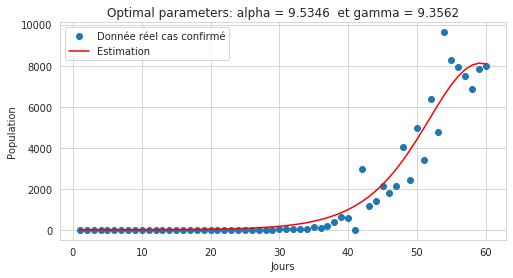

In [29]:
plt.figure(figsize=(8,4))
plt.plot(x, y, 'o',label='Donnée réel cas confirmé')
plt.plot(x, fitted,c='r',label='Estimation')
plt.xlabel('Jours')
plt.ylabel('Population')
plt.title('Optimal parameters: alpha = {0:.4f}  et gamma = {1:.4f}'.format(popt[0],popt[1]))
plt.legend()

In [30]:
df = pd.read_csv('Mada-COVID.csv')
df.head()

,Region,Lat,Long,dated,new_case,cured_case,death_case,Confirmed,Cured,Death
0,Analamanga,-18.93333,47.516665,2020-03-20,3,0,0,3,0,0
1,Analamanga,-18.93333,47.516665,2020-03-21,0,0,0,3,0,0
2,Analamanga,-18.93333,47.516665,2020-03-22,0,0,0,3,0,0
3,Analamanga,-18.93333,47.516665,2020-03-23,9,0,0,12,0,0
4,Analamanga,-18.93333,47.516665,2020-03-24,5,0,0,17,0,0


In [39]:
mada_df = pd.DataFrame()
mada_df['Date'] = df.dated.unique()
mada_df['Cas_journalier'] = df.groupby('dated').agg({'Confirmed':['sum']}).values
mada_df['Guerrison_journalier'] = df.groupby('dated').agg({'cured_case':['sum']}).values
mada_df['Mort_journalier'] = df.groupby('dated').agg({'death_case':['sum']}).values
mada_df['Cas_cumuler'] = df.groupby('dated').agg({'Confirmed':['mean']}).values
mada_df['Guerrison_cumuler'] = df.groupby('dated').agg({'Cured':['mean']}).values
mada_df['Mort_cumuler'] = df.groupby('dated').agg({'Death':['mean']}).values
mada_df = mada_df.set_index('Date')
mada_df = mada_df[60:]

mada_df['day_count'] = list(range(1,len(mada_df)+1))

ydata = [i for i in mada_df.Cas_journalier]
ydata1 = [i for i in mada_df.Guerrison_cumuler]
ydata2 = [i for i in mada_df.Mort_cumuler]

xdata = mada_df.day_count
y = np.array(ydata, dtype=float)
y1 = np.array(ydata1, dtype=float)
y2 = np.array(ydata2, dtype=float)
x = np.array(xdata, dtype=float)

In [40]:
population = float(3600000)
N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0
mor0 = 0.0

In [41]:
def sir_model(y, x, beta, gamma):
    S,I,R = y
    sus = -beta * S * I/ N
    inf = (beta * S * I/ N) - (gamma* I)
    rec = gamma* I
    
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, x, y)

fitted = fit_odeint(xdata, *popt)
print("Optimal parameters: beta =", popt[0], " gamma = ", popt[1])

Optimal parameters: beta = 0.2379303246408184  gamma =  0.1648167400109277


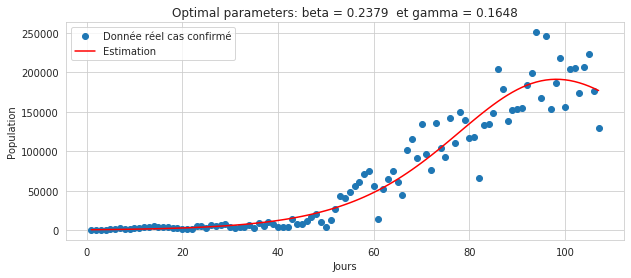

In [42]:
plt.figure(figsize=(10,4))
plt.plot(x, y, 'o',label='Donnée réel cas confirmé')
plt.plot(x, fitted,c='r',label='Estimation')
plt.xlabel('Jours')
plt.ylabel('Population')
plt.title('Optimal parameters: beta = {0:.4f}  et gamma = {1:.4f}'.format(popt[0],popt[1]))
plt.legend()

In [46]:
df_tana

,Region,Lat,Long,dated,new_case,cured_case,death_case,Confirmed,Cured,Death
0,Analamanga,-18.93333,47.516665,2020-03-20,3,0,0,3,0,0
1,Analamanga,-18.93333,47.516665,2020-03-21,0,0,0,3,0,0
2,Analamanga,-18.93333,47.516665,2020-03-22,0,0,0,3,0,0
3,Analamanga,-18.93333,47.516665,2020-03-23,9,0,0,12,0,0
4,Analamanga,-18.93333,47.516665,2020-03-24,5,0,0,17,0,0
...,...,...,...,...,...,...,...,...,...,...
791,Analamanga,-18.93333,47.516665,2020-08-31,15,2,0,15807,13832,192
802,Analamanga,-18.93333,47.516665,2020-09-01,37,6,1,15901,13915,195
815,Analamanga,-18.93333,47.516665,2020-09-02,39,9,1,15967,13965,196
829,Analamanga,-18.93333,47.516665,2020-09-03,35,66,1,16050,14031,197


In [63]:
df_tana = df[df['Region']=='Analamanga']
df_tamaga = df[df['Region']=='Atsinanana']

tana_df = pd.DataFrame()
tana_df['date'] = df_tana.dated.unique()
tana_df['Cas_journalier'] = df_tana.groupby('dated').agg({'new_case':['sum']}).values
tana_df['Mort_cumuler'] = df_tana.groupby('dated').agg({'death_case':['sum']}).cumsum().values
tana_df = tana_df.set_index('date')
tana_df = tana_df[40:120]

tana_df['day_count'] = list(range(1,len(tana_df)+1))

ydata = [i for i in tana_df.Cas_journalier]
ydata1 = [i for i in tana_df.Mort_cumuler]

xdata = tana_df.day_count
y = np.array(ydata, dtype=float)
y1 = np.array(ydata1, dtype=float)
x = np.array(xdata, dtype=float)

In [98]:
population = float(3600000)
N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0
mor0 = 0.0

In [99]:
def sir_model(y, x, beta, gamma):
    S,I,R = y
    sus = -beta * S * I/ N
    inf = (beta * S * I/ N) - (gamma* I)
    rec = gamma* I
    
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, x, y)

fitted = fit_odeint(xdata, *popt)
print("Optimal parameters: beta =", popt[0], " gamma = ", popt[1])

Optimal parameters: beta = 1.636797395331651  gamma =  1.570638165822446


Text(0.5, 1.0, 'Optimal parameter: $\\beta$ = 1.6368  and $\\gamma$ = 1.5706 so R0 = 1.0421')

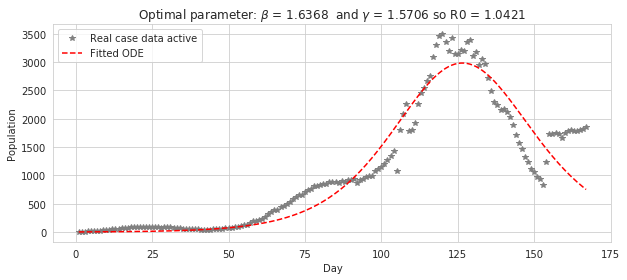

In [102]:
plt.figure(figsize=(10,4))
plt.plot(x, y, '*',label='Real case data active',c='gray')
plt.plot(x,fitted,'--',c='r',label='Fitted ODE')
plt.xlabel('Day')
plt.ylabel('Population')
plt.legend()
plt.title('Optimal parameter: '+r'$\beta$ = {0:.4f}  and $\gamma$ = {1:.4f} so R0 = {2:.4f}'.format(popt[0],popt[1],(popt[0]/popt[1])))
#plt.savefig('fit.pdf')
#plt.savefig('fit.jpg',dpi=500)

In [ ]:
tamaga_df = pd.DataFrame()
tamaga_df['Date'] = df_tamaga.Date.unique()
tamaga_df['Cas_journalier'] = df_tamaga.groupby('Date').agg({'Nouveau_cas':['sum']}).values
tamaga_df['Mort_cumuler'] = df_tamaga.groupby('Date').agg({'cas_mor':['sum']}).cumsum().values
tamaga_df = tamaga_df.set_index('Date')

tamaga_df['day_count'] = list(range(1,len(tamaga_df)+1))

ydata = [i for i in tamaga_df.Cas_journalier]
ydata1 = [i for i in tamaga_df.Mort_cumuler]

xdata = tamaga_df.day_count
y = np.array(ydata, dtype=float)
y1 = np.array(ydata1, dtype=float)
x = np.array(xdata, dtype=float)

In [74]:
population = float(3484000)
N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0
mor0 = 0.0

In [75]:
def sir_model(y, x, beta, gamma):
    S,I,R = y
    sus = -beta * S * I/ N
    inf = (beta * S * I/ N) - (gamma* I)
    rec = gamma* I
    
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, x, y)

fitted = fit_odeint(xdata, *popt)
print("Optimal parameters: beta =", popt[0], " gamma = ", popt[1])

Optimal parameters: beta = 1.6105265024105107  gamma =  1.5443644722987726


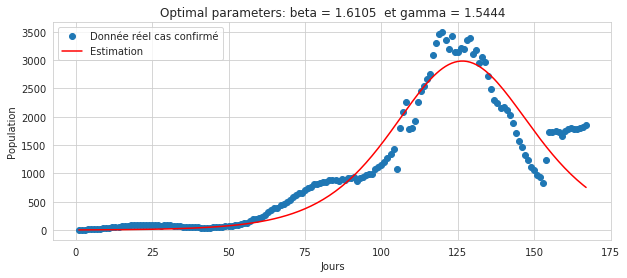

In [76]:
plt.figure(figsize=(10,4))
plt.plot(x, y, 'o',label='Donnée réel cas confirmé')
plt.plot(x, fitted,c='r',label='Estimation')
plt.xlabel('Jours')
plt.ylabel('Population')
plt.title('Optimal parameters: beta = {0:.4f}  et gamma = {1:.4f}'.format(popt[0],popt[1]))
plt.legend()

In [ ]:
tamaga_df.to_csv('tamaga_df.csv')
tana_df.to_csv('tana_df.csv') 
mada_df.to_csv('mad_df.csv')

In [95]:
df = pd.read_excel('Sir.xlsx')
df.head()

,Date,Infected,Removed,day_count
0,20/03/2020,3,0,1
1,21/03/2020,3,0,2
2,22/03/2020,3,0,3
3,23/03/2020,12,0,4
4,24/03/2020,17,0,5


In [96]:
ydata = [i for i in df.Infected]
xdata = df.day_count
y = np.array(ydata, dtype=float)
x = np.array(xdata, dtype=float)

Text(0.5, 1.0, 'e$\\alpha$')

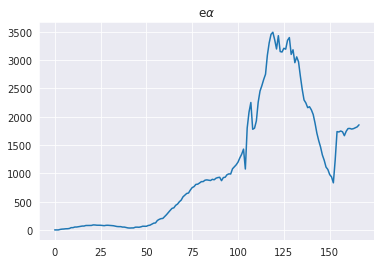

In [37]:
plt.plot(y)
plt.title('e'+r'$\alpha$')

In [31]:
print

$\alpha$
